In [1]:
import sys
import pandas as pd
import numpy as np
from ipywidgets import interact, widgets, interactive, fixed

import sys
sys.path.append('../../')
from ikmeans.ikmeans import IKMeans
from ikmeans.series_plots import sqeres_plot, pattern_plot_agr, pattern_plot, optimal_size, pattern_centers_plot
from ikmeans._ikmeans import  nearest, get_temp_info

In [2]:
def main(idx, templates, labels, size = (4,4)):
    global mask, lestes, idxs_of_best
    mask = np.where(labels == idx)[0]
    
    temp = templates.cur_templates[mask]
    center = centers[idx]
    result = list(zip(*nearest(temp, center, k_nearest = 100)))
    nearrest_templates = result[0]
    idxs_of_best = np.asarray(list(result[-1]))
    
    agrig_data, orig_data =  get_temp_info(nearrest_templates)
    
    sqeres_plot(agrig_data, size = size, save = True, name = 'approx')
    sqeres_plot(orig_data, size = size, save = True,  name = 'orig')

In [3]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
train_data = data[4]

In [6]:
ikmeans = IKMeans(train_data, 200)
ikmeans.templates_.set_options(start_level = 5, pattern_len = 124, temp_type = 'third_step')
print("Templates was loaded.")
print("Fitting...")
ikmeans.fit()
print("Initial fit was ended.")
print("Fitting next lvl...")
ikmeans.next_step()
print("Done.")

Templates was loaded.
Fitting...
Initial fit was ended.
Fitting next lvl...
Done.


C:\Users\Zoya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [7]:
labels = ikmeans.labels
templates = ikmeans.templates_
names = list(set(labels))
centers = ikmeans.init

print("Labels: ", set(labels))

Labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


### Cтроим все патерны

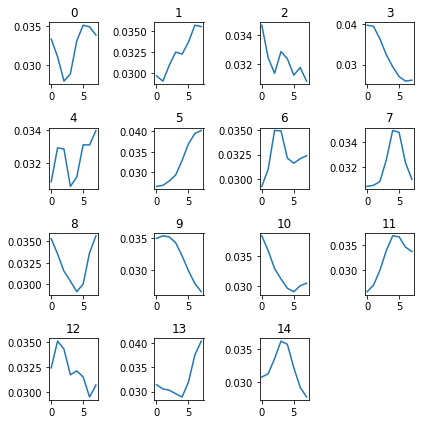

In [8]:
pattern_centers_plot(centers, names)

### Графики отдельно по каждому паттерну

In [9]:
interact(main, idx=list(set(labels)), size = fixed((4,1)), templates = fixed(templates), labels=fixed(labels));

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), …

### Паттерны на временном ряду

In [10]:
temp = templates.cur_templates
temp = temp[mask]
level = 4
COLOR = 'c'

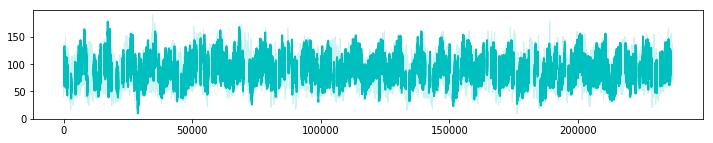

In [11]:
pattern_plot(temp, train_data, end = False, color = COLOR, save = True)

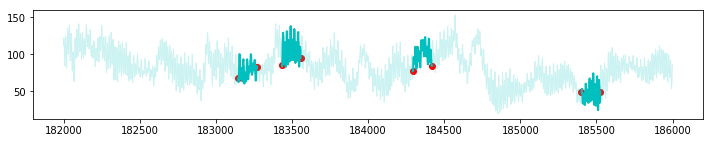

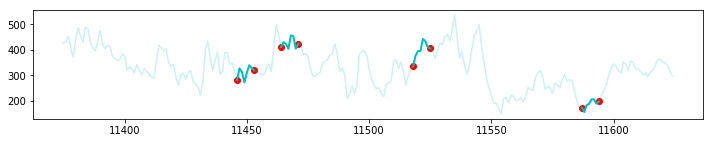

In [12]:
Xstart, Xend = 182000, 186000
pattern_plot(temp, train_data, zoom_range = [Xstart, Xend], end = True, color = COLOR)
pattern_plot_agr(train_data, temp, level = level, zoom_range= [Xstart//2**level,Xend//2**level],end = True, color = COLOR)

### Самый часто встречающийся паттерн

In [13]:
ikmeans.most_popular_clasters()

[(2, 518),
 (9, 516),
 (13, 494),
 (0, 479),
 (5, 461),
 (12, 398),
 (3, 388),
 (14, 386),
 (4, 326),
 (8, 310),
 (7, 308),
 (10, 289),
 (11, 264),
 (1, 228),
 (6, 209),
 (15, 196)]

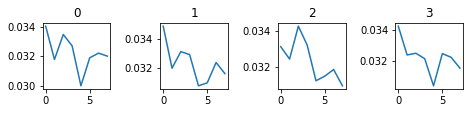

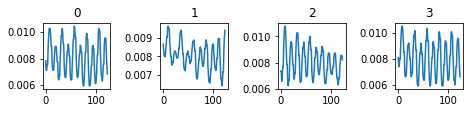

In [14]:
most_popular_pattern_id = ikmeans.most_popular_clasters()[0][0]
main(most_popular_pattern_id, size = (4,1), templates = templates, labels=labels)

In [15]:
temp = templates.cur_templates
temp = temp[mask]
level = 4
COLOR = 'b'

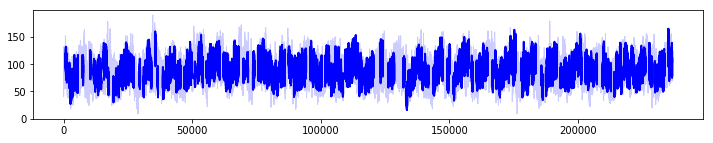

In [16]:
pattern_plot(temp, train_data, end = False, color = COLOR, save = True)

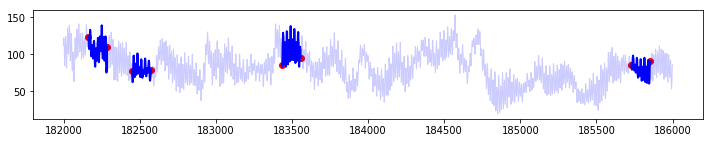

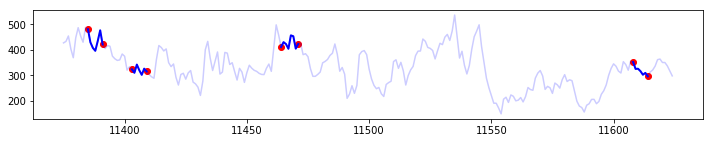

In [18]:
Xstart, Xend = 182000, 186000
pattern_plot(temp, train_data, zoom_range = [Xstart, Xend], end = True, color = COLOR)
pattern_plot_agr(train_data, temp, level = level, zoom_range= [Xstart//2**level,Xend//2**level],end = True, color = COLOR)